In [1]:
from hypernetworks.core.Hypernetwork import Hypernetwork
from hypernetworks.utils.HTCompiler import load_parser, compile_hn
from hypernetworks.utils.HTGraph import draw_hn
from hypernetworks.utils.HTTools import get_subHn_by_semantic_boundary

from IPython.display import Image, display

parser = load_parser()

In [2]:
def instantiate_hs(hn, vertex, name, boundary=""):
    def _next(next_hs):
#         start_hs = hn.hypernetwork[vertex]
        hn.hypernetwork[vertex].remove_from_boundary(boundary)
        
        for name in hn.hypernetwork[next_hs].simplex:
            _next(name)

        hn.hypernetwork[vertex].remove_from_boundary(boundary)

    _next(vertex) 

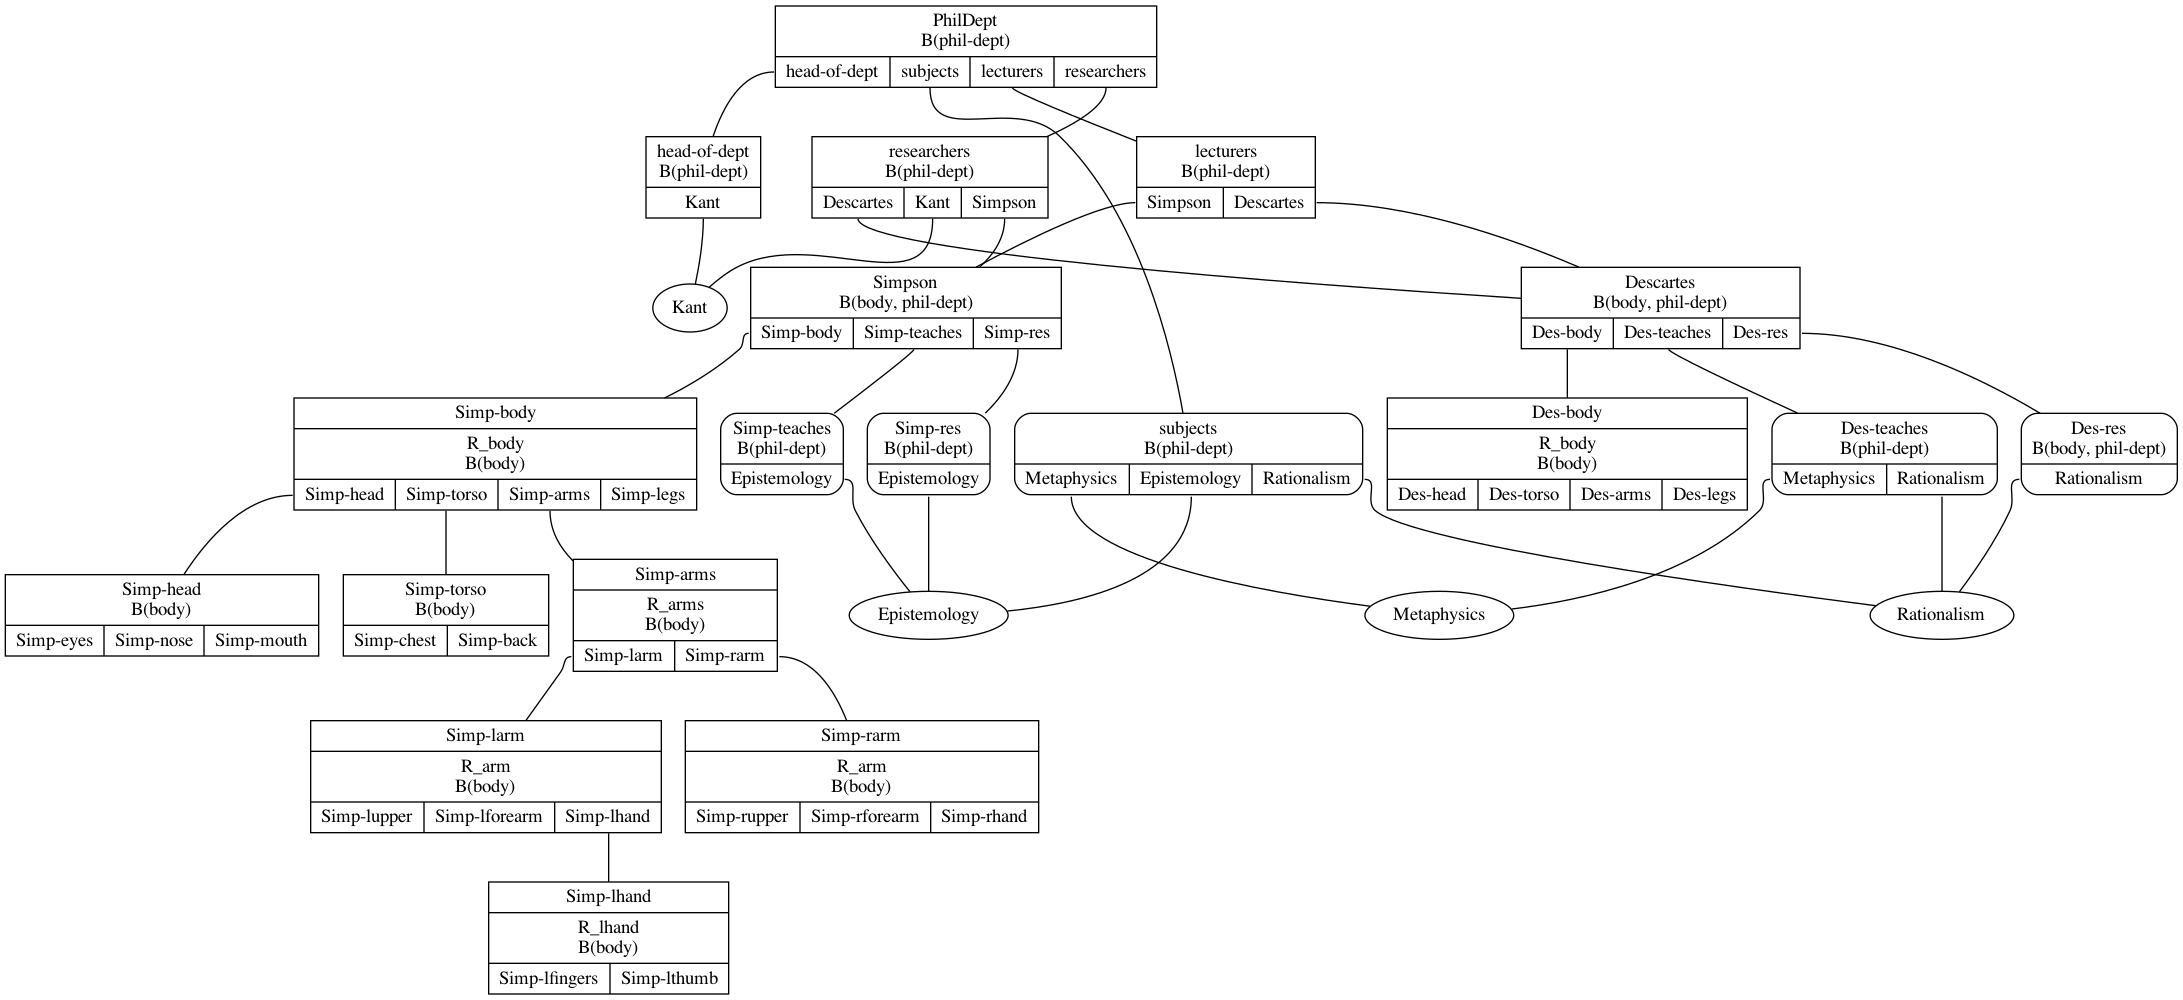

In [3]:
simpson_hn = Hypernetwork()

compile_hn(simpson_hn, parser, """
    PhilDept=<head-of-dept=<Kant>, subjects, lecturers=<Simpson, Descartes>, researchers=<Descartes, Kant, Simpson>; B(phil-dept)>
    subjects={Metaphysics, Epistemology, Rationalism; B(phil-dept)}
    
    Simpson=<Simp-body, Simp-teaches={Epistemology}, Simp-res={Epistemology}; B(phil-dept, body)>
    Descartes=<Des-body, Des-teaches={Metaphysics, Rationalism}, Des-res={Rationalism}; B(phil-dept, body)>
    
    Simp-body=<Simp-head, Simp-torso, Simp-arms=<Simp-larm, Simp-rarm; R_arms>, Simp-legs; R_body; B(body)>
    Simp-head=<Simp-eyes, Simp-nose, Simp-mouth>
    Simp-torso=<Simp-chest, Simp-back>
    Simp-larm=<Simp-lupper, Simp-lforearm, Simp-lhand; R_arm; B(body)>
    Simp-lhand=<Simp-lfingers, Simp-lthumb; R_lhand>
    Simp-rarm=<Simp-rupper, Simp-rforearm, Simp-rhand; R_arm; B(body)>

    Des-body=<Des-head, Des-torso, Des-arms, Des-legs; R_body; B(body)>
""")

simpson_hn.remove_from_boundary("Simp-body", "phil-dept")
simpson_hn.remove_from_boundary("Des-body", "phil-dept")
simpson_hn.remove_from_boundary("Simp-teaches", "body")
simpson_hn.remove_from_boundary("Simp-res", "body")
simpson_hn.remove_from_boundary("Des-teaches", "body")
simpson_hn.remove_from_boundary("Des-researches", "body")
# simpson_hn.remove_from_boundary("Simp-arms", "die")

# print(simpson_hn)

draw_hn(simpson_hn, fname="pictures/simpson", view=False, show_vertex=False)
Image(filename='pictures/simpson.png', width=1200, height=400)

Simpson=<Simp-body, Simp-teaches, Simp-res; B(body, phil-dept)>^N
Simp-body=<Simp-head, Simp-torso, Simp-arms, Simp-legs; R_body; B(body)>^N
Descartes=<Des-body, Des-teaches, Des-res; B(body, phil-dept)>^N
Des-body=<Des-head, Des-torso, Des-arms, Des-legs; R_body; B(body)>^N
Des-res={Rationalism; B(body, phil-dept)}^N
Simp-head=<Simp-eyes, Simp-nose, Simp-mouth; B(body)>^N
Simp-torso=<Simp-chest, Simp-back; B(body)>^N
Simp-arms=<Simp-larm, Simp-rarm; R_arms; B(body)>^N
Simp-larm=<Simp-lupper, Simp-lforearm, Simp-lhand; R_arm; B(body)>^N
Simp-rarm=<Simp-rupper, Simp-rforearm, Simp-rhand; R_arm; B(body)>^N
Simp-lhand=<Simp-lfingers, Simp-lthumb; R_lhand; B(body)>^N



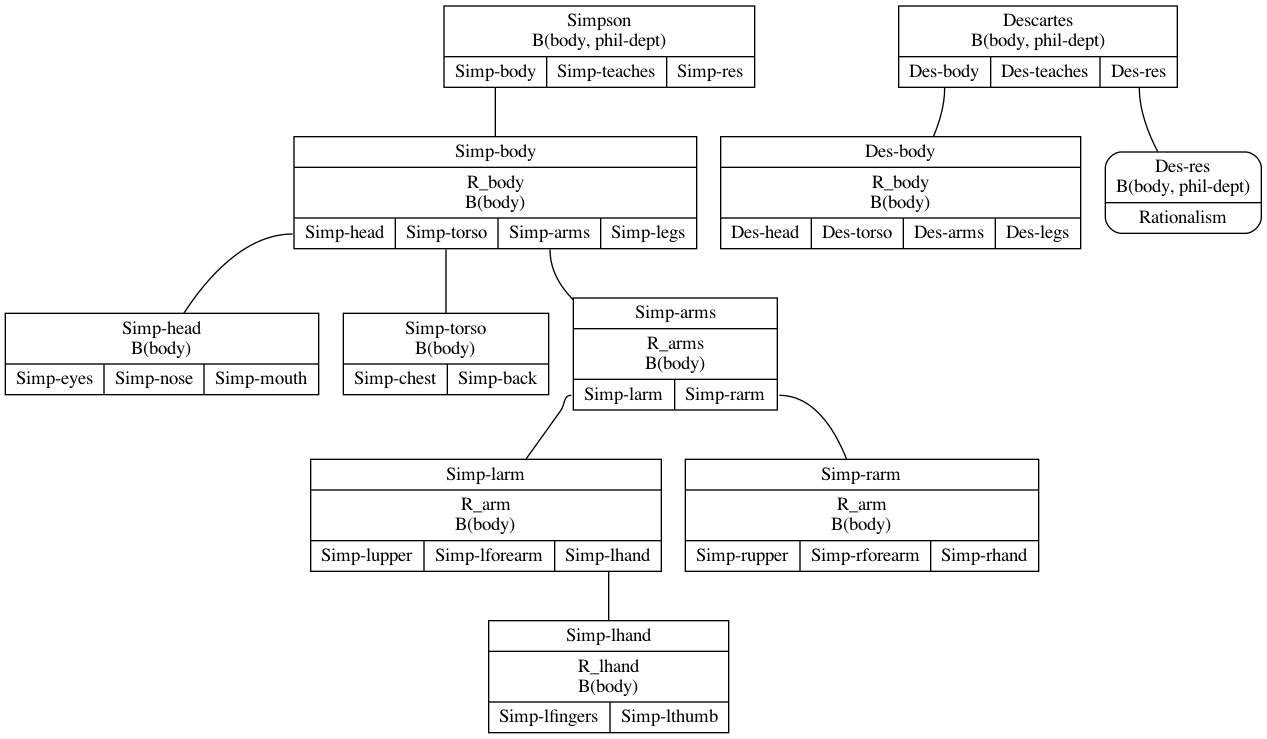

In [4]:
body_hn = Hypernetwork()
body_hn = get_subHn_by_semantic_boundary(simpson_hn, "body", body_hn)

print(body_hn)

draw_hn(body_hn, fname="pictures/simpson-body", view=False, show_vertex=False, )
Image(filename='pictures/simpson-body.png', width=900, height=400)

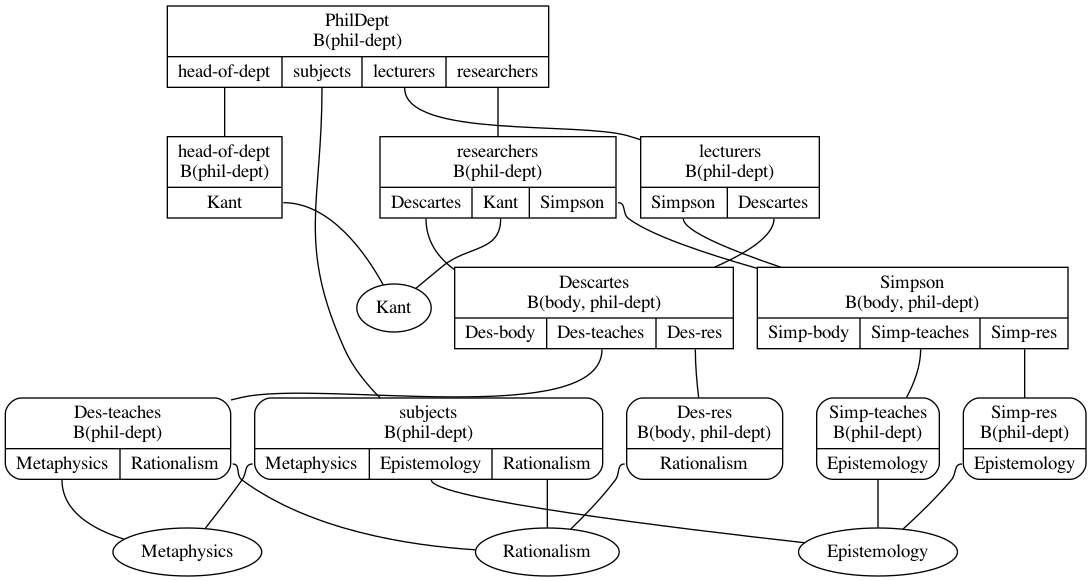

In [5]:
phil_dept_hn = Hypernetwork()
phil_dept_hn = get_subHn_by_semantic_boundary(simpson_hn, "phil-dept", phil_dept_hn)

# print(phil_dept_hn)

draw_hn(phil_dept_hn, fname="pictures/simpson-phil-dept", view=False, show_vertex=False)
Image(filename='pictures/simpson-phil-dept.png', width=1000, height=400)

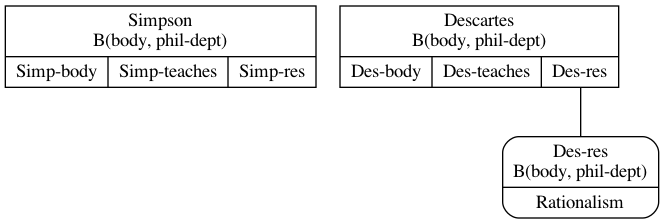

In [13]:
isec_hn = body_hn.intersection(phil_dept_hn)

draw_hn(isec_hn, fname="pictures/simpson-isec", view=False, show_vertex=False)
Image(filename='pictures/simpson-isec.png', width=800, height=400)

In [7]:
# simpson_armless_hn = Hypernetwork()
# simpson_armless_hn.copy(simpson_hn)
# simpson_armless_hn.delete("Simp-larm", B="body")
# # simpson_armless_hn.delete("Simp-larm", del_children=True)

# draw_hn(simpson_armless_hn, fname="pictures/simpson-armless-hn", view=False, show_vertex=False)
# Image(filename='pictures/simpson-armless-hn.png', width=1400, height=400)

In [8]:
# simpson_leaves_hn = Hypernetwork()
# simpson_leaves_hn.copy(simpson_hn)
# simpson_leaves_hn.delete("Simpson", B="body")

# draw_hn(simpson_leaves_hn, fname="pictures/simpson-leaves-hn", view=False, show_vertex=False)
# Image(filename='pictures/simpson-leaves-hn.png', width=1000, height=400)

In [9]:
# simpson_leaves_hn.delete("Simpson", B="phil-dept")

# draw_hn(simpson_leaves_hn, fname="pictures/simpson-leaves-2", view=False, show_vertex=False)
# Image(filename='pictures/simpson-leaves-2.png', width=1000, height=400)

In [10]:
car_hn = Hypernetwork()

compile_hn(car_hn, parser, """
    car=<engine, body, gears, drive, wheels, steering; R_car>
	engine=<engine-block, crank, transmission; R_engine>
    engine-block=<block, cylinder=<piston, sparcs>; R_engine-block>
	body=<cabin, boot, bonnet; R_body>
	cabin=<steering-wheel, gear-stick, style={
        sports=<front-seats, front-doors; R_sports>, 
        saloon=<front-seats, rear-seats, front-doors, rear-doors; R_saloon>, 
        coupe=<front-seats, rear-seats, front-doors; R_coupe>
    }; R_cabin>
	gears=<gear-stick, gearbox, clutch; R_gears>
    drive=<drive-shaft, clutch, transmission, fds=<fds-w, fds-a, fds-s>, fps=<fps-w, fps-a, fps-s>, rds=<rds-w, rds-a, rds-s>, rps=<rps-w, rps-a, rps-s>; R_drive>
	wheels=<fds-w, fps-w, rds-w, rps-w, rps-w; R>
	axels=<fds-a, fps-a, rds-a, rps-a, rps-a; R>
    suspension=<fds-s, fps-s, rds-s, rps-s; R>
	front-seats=<driver, passenger; R>
	steering=<steering-wheel, column, rack, fds, fps; R_steering>
    front-doors=<drivers-door, passenger-door; R>
    rear-doors=<ldoor, rdoor; R>
""")

# print(car_hn)

# draw_hn(car_hn, fname="pictures/car-hn", view=False)
# Image(filename='pictures/car-hn.png', width=1600, height=400)

In [11]:
# Image(filename='Thesis-examples-Boundaries.drawio.png', width=300, height=400)

In [12]:
hn = Hypernetwork()

compile_hn(hn, parser, """
    A=<a1, a2, a3; R>
    B=<b1, b2; R>
    C=<c1, c2, c3; R>
    
    a1=<a1.1, a2.1, a2.2, a3.1, c1.1, c1.2; R>
    a2=<a1.1, a2.2, a3.1, b1.2; R>
    a3=<a1.1, a3.1; R>
    
    b1=<b1.1, b1.2; R>
    b2=<a2.1, b2.1, b2.2, b1.1; R>
    
    c1=<c1.1, c1.2, c2.1; R>
    c2=<c2.1, c2.2, c3.1; R>
    c3=<c3.1, c3.2; R>
""")

# print(hn)

# draw_hn(hn, fname="pictures/boundary-hn", view=False)
# Image(filename='pictures/boundary-hn.png', width=1000, height=400)